#### Nama  : Wahyu Ferdy Irawan
#### NIM   : 5312422049


# Filter

Filter adalah sistem linier dan tidak bergantung pada waktu. Ini berarti filter memenuhi sifat-sifat berikut:

Jika $F(x(n))$ adalah fungsi filter dari sinyal input $x(n)$, maka kita memiliki:

**Linearitas:** untuk 2 sinyal $x_1(n)$ dan $x_2(n)$,

$$\large
F( x_1(n)+x_2(n) )=F( x_1(n) )+F( x_2(n) )$$

Dengan faktor $a$:

$$\large F( a \cdot x(n) )= a \cdot F( x(n) )$$

**yang berarti kita dapat "mengeluarkan" jumlah dan faktor dari fungsi kita.**

**Invarians-Waktu:** jika

$$\large y(n) = F(x(n))$$

maka kita memiliki, untuk penundaan sebesar $n_0$:

$$\large
y(n+n_0)=F(x(n+n_0))
$$

yang berarti fungsi kita **tetap tidak peduli kapanpun** kita menerapkannya.


## Filter FIR

Filter Finite Impulse Response (**FIR**) sederhana memiliki persamaan perbedaan seperti berikut, dengan x(n) adalah input filter kita, dan y(n) adalah outputnya:

$$\large
y(n)=\sum _ {m=0}^ L b(m) x(n-m)
$$

Perhatikan bahwa ini adalah **konvolusi** dari sinyal x(n) dengan b(n). Di sini, b(m) adalah koefisien filter, atau **respon impuls**. Ini biasanya juga disebut sebagai **"ketukan "**, karena sistem ini dapat dilihat sebagai "mengetuk" garis tunda, seperti yang terlihat pada gambar di bawah ini.

Persamaan perbedaan ini juga merupakan bagaimana biasanya filter diimplementasikan dalam Matlab atau Python dan bahasa pemrograman lainnya. Diagram blok tipikal filter FIR adalah sebagai berikut:

<center>
    <img src="https://nbviewer.org/github/GuitarsAI/ADSP_Tutorials/blob/master/images/fir_filter_diag.PNG" width="1200">
</center>
<font size="2">      
(Diambil dari: http://en.wikipedia.org/wiki/Finite_impulse_response)
</font>

Perhatikan bahwa di sini blok dengan $z^{-1}$ diimplementasikan dengan penundaan selama 1 interval sampling, bukan perkalian dengan $z^{-1}$, seperti yang kita lakukan pada domain-z!

Setelah blok penundaan pertama $z^{-1}$ kita memiliki $x[n-1]$, setelah blok penundaan kedua kita memiliki $x[n-2]$, dan seterusnya. Setiap blok penundaan "menghafal" nilai dari kiri untuk satu siklus clock sampel, dan melepaskannya ke kanan pada siklus clock sampel berikutnya.
Oleh karena itu, mereka menunda sampel sebanyak 1 siklus clock sampel.

Transformasi-z dari persamaan selisih konvolusi kita

$$\large
y(n)=\sum _ {m=0} ^L b(m) x(n-m)
$$

 adalah (dengan menggunakan barisan transformasi-z):

$$\large
Y(z)= \sum _ {m=0} ^ L b(m) \cdot z^{-m} \cdot X(z)= X(z) \cdot \sum _ {m=0} ^ L b(m) \cdot z^{-m}
$$

Sekarang kita dapat menghitung **fungsi transfer**, yang didefinisikan sebagai output dibagi dengan input,

$$\large
H(z):= \frac{Y(z)} {X(z)}=\sum _ {m=0} ^ L b(m) \cdot z^{-m}
$$

**Perhatikan bahwa ini adalah transformasi-z dari koefisien b(m)! Ini adalah **transformasi-z dari respons impuls** dari filter FIR!

Sekarang kita dapat memperoleh **respon frekuensi** (sehingga kita dapat melihat frekuensi mana yang dilemahkan dan mana yang tidak) dari fungsi transfer filter kita dengan hanya mengganti $z$ dengan $e^{j \Omega}$:

$$\large
H(e^{j \ Omega})=\sum _{m=0} ^L b(m) \cdot e^{-j\Omega \cdot m}
$$

Karena $e^{j\Omega}$ adalah bilangan kompleks, maka respons frekuensi $H$ juga merupakan bilangan kompleks. Oleh karena itu, $H$ adalah bilangan kompleks untuk setiap frekuensi $\Omega$. Biasanya diplot sebagai plot **magnitude** dan plot **fase** terhadap frekuensi. Magnitudo menunjukkan atenuasi pada setiap frekuensi, dan fase menunjukkan pergeseran fasa untuk setiap frekuensi. Dengan menggunakan 2 plot atau properti tersebut, kita juga dapat mendesain filter dengan properti yang diinginkan (misalnya stop-band pada frekuensi tertentu). Fungsi Matlab dan Python untuk menghasilkan plot magnitudo dan fase dari fungsi transfer atau sinyal adalah "freqz", yang telah kita lihat.

**Recommended**: https://github.com/GuitarsAI/MRSP_Notebooks - 03 Frequency Response

## Filter IIR

Persamaan differensialnya adalah:

$$\large
\begin{equation}
y(n)= \sum _{m=0} ^L b(m) \cdot x(n-m)+ \sum _ {r=1} ^R a(r) \cdot y(n-r)
\end{equation}$$    

Di sini kita memiliki **2 konvolusi**. Amati umpan balik dari output y kembali ke input dalam penjumlahan ini. Perhatikan juga bahwa bagian umpan balik dimulai dengan penundaan r = 1. Ini karena kita ingin menghindari apa yang disebut dengan loop tanpa penundaan. Kita tidak dapat menggunakan nilai y(n) sebelum kita menghitungnya.

Gambar berikut ini menunjukkan diagram blok yang sesuai dengan filter kita,

<center>
    <img src="https://nbviewer.org/github/GuitarsAI/ADSP_Tutorials/blob/master/images/Lecture7-2.PNG" width="1200">
</center>


Juga, di sini, kotak dengan $z^{-1}$ melambangkan penundaan 1 periode sampling, dan segitiga melambangkan perkalian dengan faktor yang ditulis di sebelahnya.


Kita dapat menyederhanakan struktur ini dengan menggabungkan penjumlahan,

<center>
    <img src="https://nbviewer.org/github/GuitarsAI/ADSP_Tutorials/blob/master/images/Lecture7-3.PNG" width="1200">
</center> </center

Transformasi-z dari persamaan selisihnya (1) adalah

$$ \large
Y(z)= \sum _{m=0} ^ L b(m) \cdot X(z) \cdot z^{-m} + \sum _{r=1} a(r) \cdot Y(z) \cdot z^{-r}$$

**Perhatikan:** **Matlab dan Octave** dan **Python scipy.signal.lfilter** mendefinisikan koefisien a dengan **tanda yang berlawanan** seperti yang kami dan Oppenheim/Schafer definisikan. Lihat misalnya "help filter" atau "help(scipy.signal.lfilter)" dalam Python.

Untuk mendapatkan fungsi transfernya, pertama-tama kita pindahkan Y(z) ke satu sisi:

$$\large
Y(z)(1-\sum _ {r=1} ^ R a(r) \cdot z^{-r})= X(z) \cdot \sum _{m=0} ^ L b(m) \cdot z^{-m}
$$

Oleh karena itu, fungsi transfer yang dihasilkan adalah

$$ \large
H(z)=\frac{Y(z)} {X(z)}= \frac{\sum _ {m=0} ^ L b(m) \cdot z^{-m}}{1-\sum _ {r=1} ^ R a(r) \cdot z^{-r}}
$$


**Amati:** Dengan bantuan z-Transform kami dapat menemukan solusi bentuk tertutup untuk fungsi transfer, meskipun kami memiliki loop umpan balik dalam sistem kami! Ini adalah **keuntungan besar** untuk z-Transform.

Di sini kita dapat melihat bahwa kita memperoleh polinomial dalam **penyebut** fungsi transfer kita, dan karenanya memiliki kutub. Dan filter berpotensi menjadi tidak stabil! Angka nol dari polinomial penyebut ini menjadi kutub fungsi transfer. Jika semua kutub ini berada **di dalam lingkaran satuan**, kita memiliki **filter yang stabil**! Hal ini juga menunjukkan bahwa kita hanya perlu mendesain koefisien a(n) sedemikian rupa sehingga **kutub-kutub tersebut berada di dalam lingkaran satuan untuk kestabilan**.


## Struktur Gabungan FIR-IIR yang digunakan dalam Fungsi "lfilter" Python:

Karena penundaan adalah operator linier, kita dapat menggesernya setelah penjumlahan, dan karenanya dapat menggabungkan rantai penundaan untuk bagian FIR dan IIR. Hal ini mengurangi kebutuhan memori untuk implementasi, dan menghasilkan struktur berikut,

<center>
    <br>
    <img src="https://nbviewer.org/github/GuitarsAI/ADSP_Tutorials/blob/master/images/diagram.png" width="1200">
</center>

## Contoh Filter

Kembali ke contoh sederhana kita tentang sinyal yang meluruh secara eksponensial, ini menunjukkan bagaimana mengimplementasikannya. Kita hanya membutuhkan sistem dengan kutub pada posisi p. Dalam persamaan di atas, kita mendapatkannya dengan mengatur b(0)=1 dan a(1)=p. Oleh karena itu, kita memperoleh persamaan perbedaan sederhana

$$\large
y(n)=1\cdot x(n)+p \cdot y(n-1)$$

Di sini Anda dapat melihat: jika x(n) adalah pulsa satuan, keluarannya adalah deret peluruhan eksponensial:

$$\large
1, p, p^{2}, p^{3},...
$$

yang merupakan respons impuls yang sangat panjang. Oleh karena itu dinamakan IIR.

Ini juga dapat ditulis dalam bentuk diagram blok:

<center>
    <br>
    <img src="https://nbviewer.org/github/GuitarsAI/ADSP_Tutorials/blob/master/images/diagram2.png" width="1200">
</center>


(bandingkan juga dengan diagram blok implementasi Python di atas, untuk $b[0]=1$ dan $a[1]=p$).
Dalam domain-z, ini adalah

$$\large
Y(z)=X(z)+p \cdot z^{-1} \cdot Y(z)$$


$$\large
\rightarrow H(z)=\frac{Y(z)}{X(z)}= \frac{1}  {1-p \cdot z^{-1}}
$$

Dalam struktur ini kita sekarang dapat melihat perulangan umpan balik. Perhatikan bahwa ini sama dengan z-Transformasi dari deret eksponensial kita sebelumnya. Ini berarti, ketika kita mentransformasikannya kembali ke domain waktu, kita mendapatkan fungsi eksponensial, yang merupakan **respon impuls filter**, yang menegaskan apa yang baru saja kita lihat dengan menggunakan impuls dalam domain waktu untuk filter kita. Jadi, hasil dari invers z-Transformasi dari fungsi transfer kita adalah,

$$\large
1, p, p^{2}, p^{3},...
$$.


### Computing the Resulting Frequency Response

**Contoh:** Fungsi Matlab atau Octave atau Python "freqz" (kami memiliki fungsi Python freqz juga di Moodle) dapat digunakan untuk memplot magnitudo dan plot fase fungsi transfer filter ini. Masukannya secara langsung adalah koefisien a dan b dari fungsi transfer H(z), dalam bentuk:  ```freqz(B,A)```, di mana B dan A adalah vektor yang berisi koefisien.

Jika kita memilih $a(1)=p=0.9$ dalam contoh kita, kita memperoleh $A=[1,-0.9]$ dan $B=[1].$


In [3]:
# %matplotlib notebook
from scipy.signal import freqz
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

In [19]:
A=np.array([1,-0.9])
B=np.array([1, 0])
w, h = freqz(B, A, worN=512, whole=False)

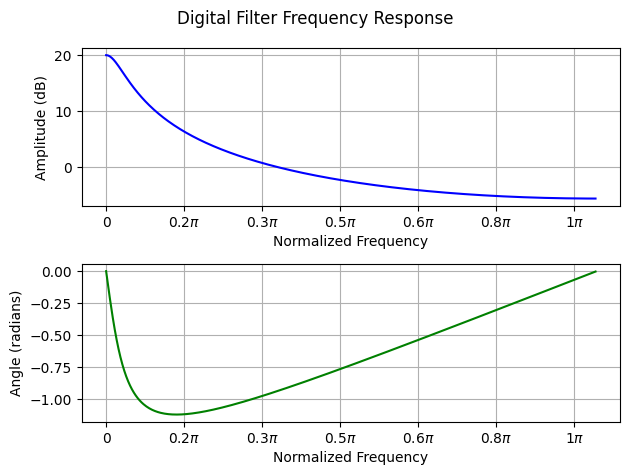

In [20]:
fig = plt.figure()
plt.suptitle('Digital Filter Frequency Response')  # Menggunakan plt.suptitle() untuk judul keseluruhan

# Menghapus subplot sebelumnya secara eksplisit
plt.subplot(2,1,1)
plt.cla()  # Membersihkan plot sebelumnya
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude (dB)')
plt.xlabel('Normalized Frequency')
plt.grid()
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val, pos: '{:.0g}$\pi$'.format(val/np.pi) if val != 0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.5))

# Subplot kedua
plt.subplot(2,1,2)
plt.cla()  # Membersihkan plot sebelumnya
angles = np.angle(h)
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)')
plt.xlabel('Normalized Frequency')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val, pos: '{:.0g}$\pi$'.format(val/np.pi) if val != 0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.5))

plt.grid()
plt.tight_layout()
plt.show()


Bagian atas plot menunjukkan respons amplitudo filter dalam bentuk kurva dB terhadap frekuensi ter-normalisasi. Frekuensi ter-normalisasi ini dinyatakan dalam satuan siklus per sampel (cyclical frequency), dengan rentang dari 0 hingga π yang mewakili setengah siklus dari frekuensi sampel. Kurva ini menggambarkan bagaimana filter merespons berbagai frekuensi, menunjukkan di mana amplitudo mencapai nilai tertinggi (puncak) atau terendah (lembah). Pada contoh ini, filter menunjukkan penguatan yang signifikan pada frekuensi rendah, mengindikasikan bahwa filter ini efektif untuk memperkuat komponen frekuensi rendah dalam sinyal yang diberikan.

Bagian bawah plot menampilkan respons fase filter dalam radian terhadap frekuensi ter-normalisasi. Respons fase ini memberikan informasi tentang perubahan fase yang diterapkan pada berbagai komponen frekuensi oleh filter. Plot fase berguna untuk menganalisis bagaimana filter memodifikasi sinyal masukan pada domain frekuensi. Dalam kasus ini, respons fase filter tampak berfluktuasi namun tetap dalam rentang yang dapat diterima untuk aplikasi filter pada umumnya.

Perlu diperhatikan bahwa sumbu horizontal menunjukkan frekuensi yang dinormalisasi, dengan sisi kanannya adalah π, yang merupakan frekuensi Nyquist atau setengah dari frekuensi sampling. Respons frekuensi yang ditampilkan di sini menunjukkan karakteristik low pass.

Kita dapat menggunakan perintah "zplane" (juga pada Moodle) untuk memplot lokasi nol dan kutub pada z-plane yang kompleks.
Untuk itu pertama-tama kita harus menghitung posisi kutub dan nol dengan fungsi Python np.roots.

Diketahui

$$\large H(z) = \dfrac{1}{1-p \cdot z^{-1}} $$

dan roots mengharapkan sebagai argumen koefisien-koefisien terurut dari polinomial kita dalam $z^-1$ (yang membuatnya kompatibel dengan *lfilter*). Oleh karena itu, posisi kutub kita adalah `np.roots(a)` dan angka nol pada `np.roots(b)`.

In [21]:
def zplane(B,A):
    # Plot Pole dan Zero
    from  matplotlib import patches
    plt.figure(figsize=(6,4))
    ax = plt.subplot(111)
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    #ticks = [-1, 1]; plt.xticks(ticks); plt.yticks(ticks)
    # Unit Circle
    uc = patches.Circle((0,0), radius=1, fill=False, color='black', ls='dashed')
    ax.add_patch(uc)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.xlabel('Re', horizontalalignment='right', x=1.0)
    plt.ylabel('Im',  y=1.0)
    plt.title('Complex z-Plane', loc='right')
    plt.grid()
    plt.plot(np.real(A),np.imag(A),'rx')
    plt.plot(np.real(B),np.imag(B),'bo')

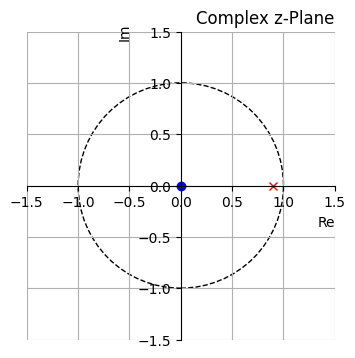

In [22]:
zplane(np.roots(B),np.roots(A))

Fungsi zplane menghasilkan plot bidang z kompleks yang menampilkan poles dan zeros dari sebuah filter. Plot ini mencakup lingkaran satuan sebagai referensi, dengan poles ditandai oleh simbol 'x' merah dan zeros oleh simbol 'o' biru. Sumbu real dan imajiner disajikan dengan titik pusat di tengah, dilengkapi dengan grid dan label untuk memudahkan analisis. Distribusi poles dan zeros ini memberikan wawasan tentang karakteristik filter, termasuk stabilitas dan respons frekuensinya.

**Contoh implementasi dengan Python:**

Gunakan fungsi *`lfilter()`* untuk memperoleh impulse respon dari filter IIR ini
        

<ipython-input-23-69f340e1ecfe>:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(y, use_line_collection=True)


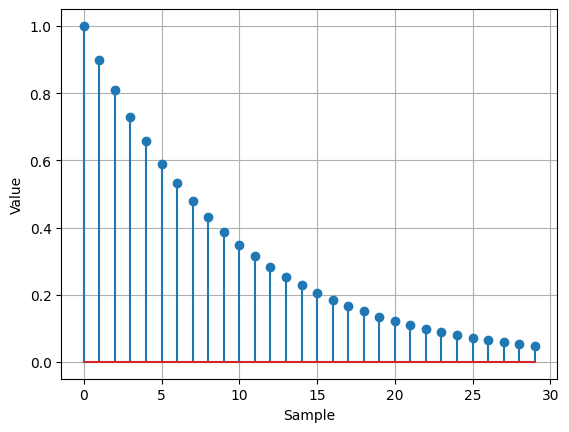

In [23]:
import scipy.signal
import matplotlib.pyplot as plt
# Mulai dengan menentukan unit pulse sebagai x
x=np.zeros(30)
x[0] = 1
# B dan A ditentukan seperti sebelumnya
A=[1,-0.9];
B=[1];
# Kemudian hitung impulse responnya
y=scipy.signal.lfilter(B,A,x);
plt.figure()
plt.stem(y, use_line_collection=True)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()


Kode tersebut menampilkan plot respons impuls dari filter digital yang mana plot ini menunjukkan bagaimana filter merespons sinyal input unit pulse, dengan nilai yang menurun secara eksponensial. Sumbu horizontal menunjukkan indeks sampel (0 hingga 29) dan sumbu vertikal menunjukkan nilai respons. Filter ini memiliki karakteristik low-pass, dengan efek input yang meredam seiring waktu.

Di sini kita dapat melihat fungsi peluruhan eksponensial (urutan $ir(n)=p^{n}$ untuk p=0.9). Dengan cara ini kita juga dapat menguji filter IIR yang lebih rumit.

Respon impuls yang meluruh secara eksponensial ini sekali lagi menunjukkan kestabilan filter, yang sudah diperkirakan karena kutub fungsi transfernya dalam domain-z ditempatkan pada z = 0,9, dan oleh karena itu berada di dalam lingkaran-satuan!